# COSC 3337 Lab 06 Minh Nguyen
### Decision Trees and Random Forest

## Exploratory Data Analysis

Import libraries

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Since the dataset didn't contain the header/column names, we can add the column names and data into a DataFrame

In [292]:
car_data = pd.read_csv('car_evaluation.csv', header=None)
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.head(7)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc


Checking table info

In [293]:
car_data.shape

(1728, 7)

In [294]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [295]:
car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


We don't have any null values, which is a good sign

Let's make some `countplot` to confirm the above analysis

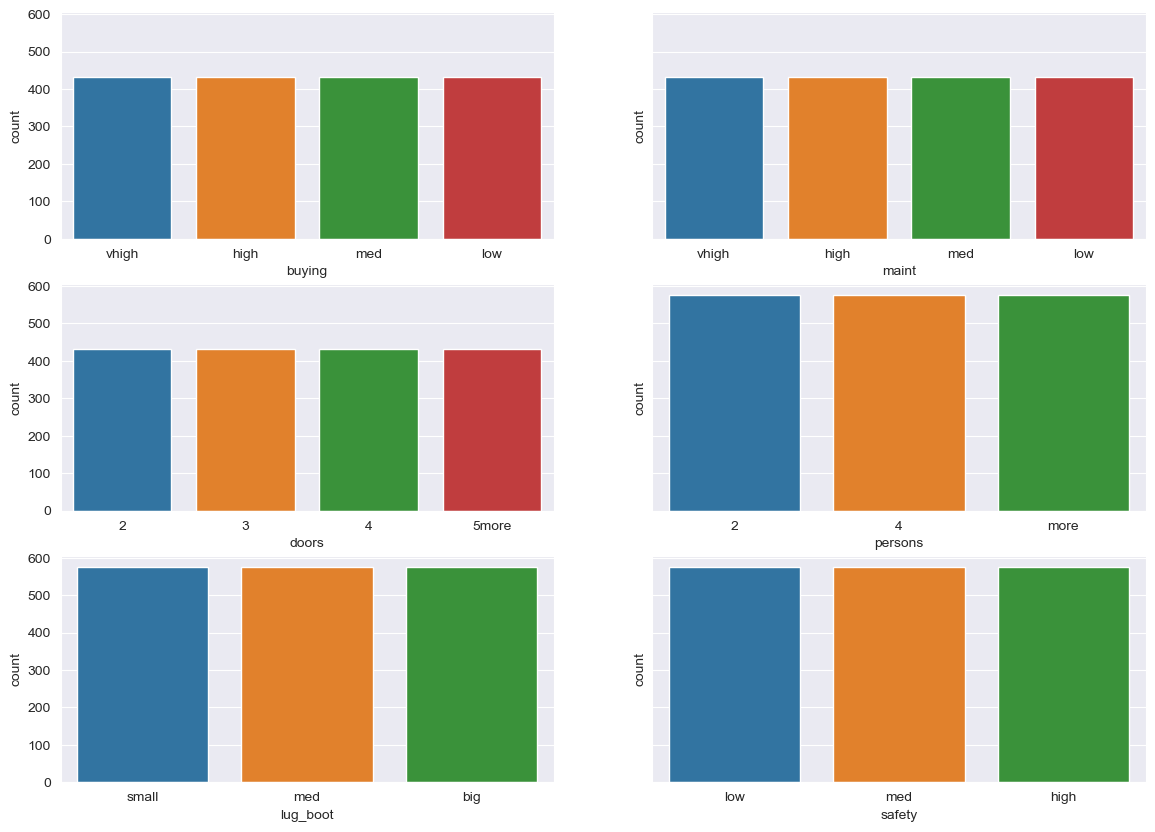

In [296]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))

sns.countplot(x=car_data['buying'], ax=axes[0][0])
sns.countplot(x=car_data['maint'], ax=axes[0][1])
sns.countplot(x=car_data['doors'], ax=axes[1][0])
sns.countplot(x=car_data['persons'], ax=axes[1][1])
sns.countplot(x=car_data['lug_boot'], ax=axes[2][0])
sns.countplot(x=car_data['safety'], ax=axes[2][1])

plt.show()

`buying`

In [297]:
car_data['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

`maint`

In [298]:
car_data['maint'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

`doors`

In [299]:
car_data['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

`persons`

In [300]:
car_data['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

Target/ `class` variable

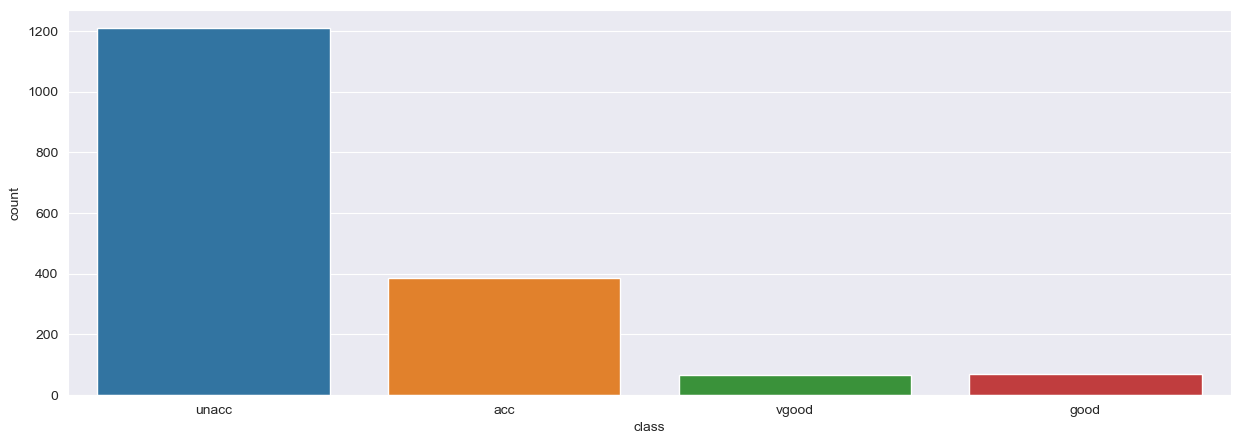

In [301]:
sns.countplot(x=car_data['class'])
plt.show()

Number of `class` values

In [302]:
car_data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

We have majority of `unacc` value and `acc` value. We just have a few of `good` and `vgood` records.

## Data Preprocessing

Now, we have to prepare our data for training. All of our variables are ordinal categorical variables.
We need to make sure that the order is preserved when got encoded. 

*Note: We can't use one hot encoding / get_dummies here because that won't preserve the order.*

In [303]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Creating mappings that preserve the order of data

In [304]:
# buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
# maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
# door_mappings = {'2':2, '3':3, '4':4, '5more':5}
# persons_mappings = {'2':2, '4':4, 'more':5}
# lug_boot_mappings = {'small':0, 'med':1, 'big':2}
# safety_mappings = {'low':0, 'med':1, 'high':2}
# class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

Test: How about if we change the order in the dictionary

In [305]:
buying_mappings_test = {'low':0, 'high':2, 'med':1, 'vhigh':3}
maint_mappings_test = {'low':0, 'high':2, 'vhigh':3, 'med':1}
door_mappings_test = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings_test = {'2':2, '4':4, 'more':5}
lug_boot_mappings_test = {'small':0, 'big':2, 'med':1}
safety_mappings_test = {'med':1, 'low':0, 'high':2}
class_mappings_test = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

Then we can use `.map(dict)` to apply the above mappings to the corresponding columns.

In [306]:
# car_data['buying'] = car_data['buying'].map(buying_mappings)
# car_data['maint'] = car_data['maint'].map(maint_mappings)
# car_data['doors'] = car_data['doors'].map(door_mappings)
# car_data['persons'] = car_data['persons'].map(persons_mappings)
# car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings)
# car_data['safety'] = car_data['safety'].map(safety_mappings)
# car_data['class'] = car_data['class'].map(class_mappings)

Map the table with our changed mappings

In [307]:
car_data['buying'] = car_data['buying'].map(buying_mappings_test)
car_data['maint'] = car_data['maint'].map(maint_mappings_test)
car_data['doors'] = car_data['doors'].map(door_mappings_test)
car_data['persons'] = car_data['persons'].map(persons_mappings_test)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings_test)
car_data['safety'] = car_data['safety'].map(safety_mappings_test)
car_data['class'] = car_data['class'].map(class_mappings_test)

Let's see if the table got mapped (instead of original data)

In [308]:
car_data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
5,3,3,2,2,1,2,0
6,3,3,2,2,2,0,0
7,3,3,2,2,2,1,0
8,3,3,2,2,2,2,0
9,3,3,2,4,0,0,0


*Note: If we use 2 mapping sets for the same table, then we're gonna get NaN (since after the first time, data will be changed, so the second mapping cannot be applied correctly)*

## Creating Our Tree Models

Begin creating and training our model.

First, we need to split our data into training and testing sets using `sklearn`

In [309]:
from sklearn.model_selection import train_test_split

X = car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
# class is the target variable
y = car_data['class']
# test size around 0.3 can be considered as good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [310]:
X_train

,buying,maint,doors,persons,lug_boot,safety
840,2,0,5,2,1,0
170,3,2,4,2,2,2
1666,0,0,3,5,0,1
125,3,2,2,4,2,2
935,1,3,4,4,2,2
...,...,...,...,...,...,...
1361,0,3,4,4,0,2
1613,0,1,5,5,0,2
1085,1,1,2,2,1,2
994,1,2,2,5,1,1


In [311]:
X_test

,buying,maint,doors,persons,lug_boot,safety
912,1,3,3,5,1,0
1084,1,1,2,2,1,1
1218,1,0,3,2,1,0
548,2,2,2,2,2,2
399,3,0,4,5,1,0
...,...,...,...,...,...,...
1443,0,2,3,4,1,0
1497,0,2,5,4,1,0
684,2,1,3,4,0,0
966,1,3,5,5,1,0


Import *`sklearn`*'s `DecisionTreeClassifier` model and begin training it using the `fit(train_data, train_data_labels)` method.

In [312]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [313]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini_test = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# fit the model
clf_gini_test.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

## Model Evaluation

We've finished training, we can make `predictions` off of the test data and evaluate our model's performance using the corresponding test data labels (y_test).

Prediction with the `test` set

In [314]:
# predict the test set results with criterion gini index
y_prediction_gini = clf_gini.predict(X_test)

Prediction with the `train` set

In [315]:
# predict the train set results with criterion gini index
y_prediction_train_gini = clf_gini.predict(X_train)

*`sklearn`*'s `accuracy_score` to evaluate our model. This will take the `true values` and `predictions` as input.

In [316]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index (test set): {:.4f}'.format(accuracy_score(y_test, y_prediction_gini)))

Model accuracy score with criterion gini index (test set): 0.7784


In [317]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index (train set): {:.4f}'.format(accuracy_score(y_train, y_prediction_train_gini)))

Model accuracy score with criterion gini index (train set): 0.7974


Compare the `train-set` and `test-set` accuracy and check for overfitting.

In [318]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7974
Test set score: 0.7784


These two values are quite comparable, so there is no sign of overfitting.

In [319]:
print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_prediction_train_gini)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7974
Test set score: 0.7784


We can see that `accuracy_score(y, y_pred)` and `score(x, y)` are kind of the same.

## Visualize decision-trees

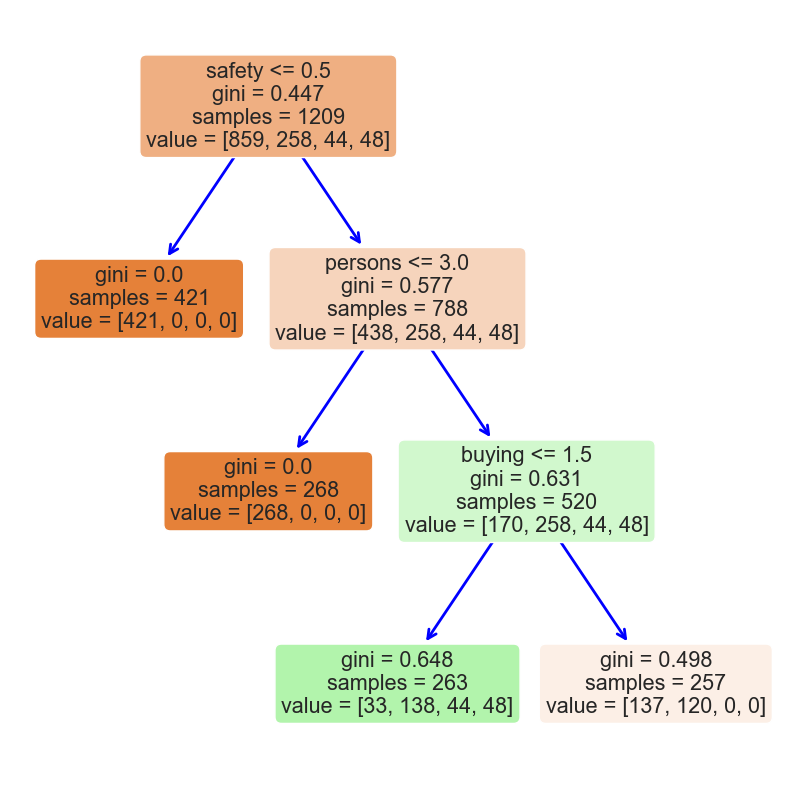

In [320]:
from sklearn import tree
# tree.plot_tree(clf_gini) 
# plt.show()

fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(2)

### Try creating a Decision Tree Classifier with criterion `entropy`

In [321]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [322]:
# predict the test set results with criterion entropy index
y_pred_entropy = clf_entropy.predict(X_test)
print('Model accuracy score with criterion entropy index (test set): {:.4f}'.format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index (test set): 0.7784


We can see that there isn't a big difference between `gini` and `entropy` criterions. I believe it just depends on personal preference.

Decision Tree Classifier with criterion `entropy`, but without rounded shape and colors

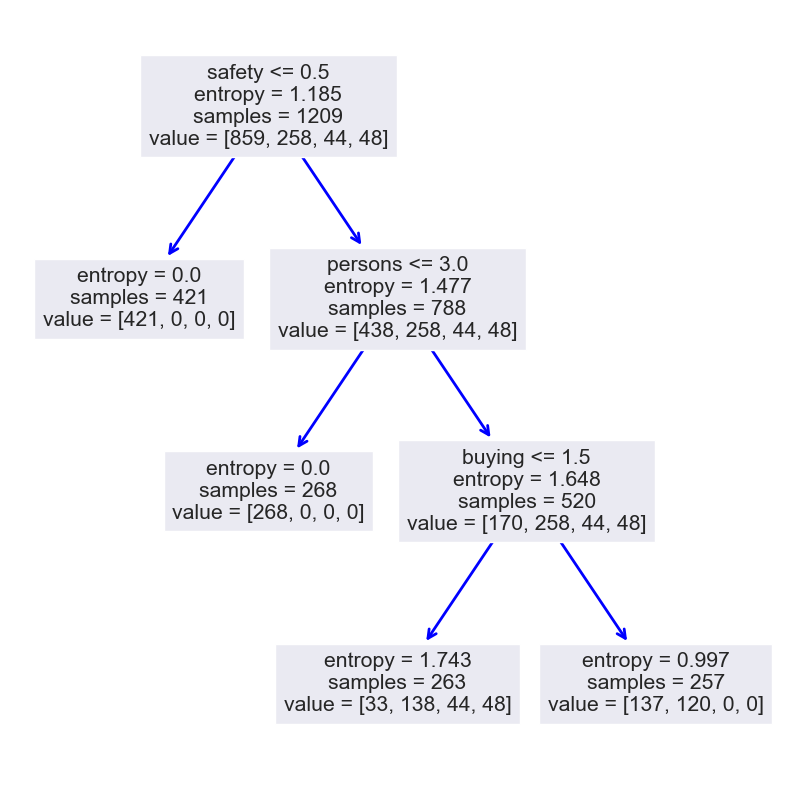

In [323]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_entropy,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(2)

Decision Tree Classifier with criterion `entropy`, with rounded shape and colors

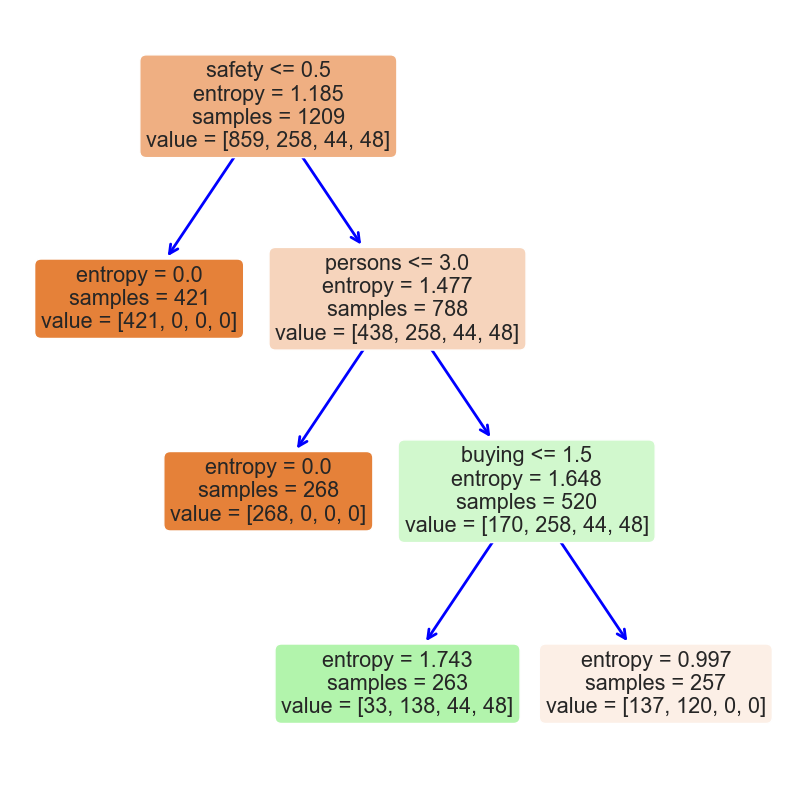

In [324]:
# from sklearn import tree
# tree.plot_tree(clf_entropy) 
# plt.show()

fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_entropy, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(2)

## Random Forests

Compare the decision tree model to a random forest. We need to use `RandomForestClassifier`

In [325]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [326]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.9769


In [327]:
rfc_200 = RandomForestClassifier(n_estimators=200)
rfc_200.fit(X_train, y_train)
rfc_200_pred = rfc_200.predict(X_test)
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, rfc_200_pred)))

Model accuracy score: 0.9750


In [328]:
rfc_1000 = RandomForestClassifier(n_estimators=1000)
rfc_1000.fit(X_train, y_train)
rfc_1000_pred = rfc_1000.predict(X_test)
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, rfc_1000_pred)))

Model accuracy score: 0.9769


In [329]:
rfc_10000 = RandomForestClassifier(n_estimators=10000)
rfc_10000.fit(X_train, y_train)
rfc_10000_pred = rfc_10000.predict(X_test)
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, rfc_10000_pred)))

Model accuracy score: 0.9769


**We can see how strong the random forest performed.**